#  Homework

<br><br>
1.  Calculate the DC term for a 48x48 image.  Create the image array using the random number seed of 20,000.  Show that the DC term equals the sum of the input signal.

In [1]:
#  DC (the sum of the input signal, it is called the bias term) term example
import numpy as np
import scipy.fftpack as ft
import matplotlib.pyplot as plt
import imageio

np.random.seed(20000)
mga = np.random.ranf((48,48))
mgb = ft.fft2(mga)
print('\nSum of input signal:', round(mga.sum(),2))
print('\nDC Term:', np.round(mgb[0,0],2))

print("In this example, the DC term is definitely the same as the sum of the input signal")

def KaiserMask(shape, center, r1, r2):
    # returns a mask that you can use over and over again.
    di, dj = center  # location of the center of the window
    v,h = shape
    theta = 2. * np.pi
    Iot = 1.0 + theta/4. + 2.*theta/64. + 3.*theta/2304.
    
    # compute radii
    vindex = np.multiply.outer(np.arange(v), np.ones(h))
    hindex = np.multiply.outer(np.ones(v), np.arange(h))
    a = (di-vindex).astype(float)
    b = dj-hindex
    r = np.sqrt(a*a + b*b)
    del a,b
    
    # inside r1, and outside r2 are easy
    mask = np.zeros(shape, float)
    mask = (r < r1).astype(int)
    
    # work on the ring between
    b = np.logical_and((r<r2), (r>r1))
    m = (r-r1)/(r2-r1)
    m = m*b
    a = theta * np.sqrt( 1.-m*m)
    a = 1.0 + a/4.0 + 2.0*a/64.0 + 3.0*a/2304.0
    a = a / Iot
    a = a * (r< r2)
    a = a * (r>=r1).astype(int)
    mask = mask + a
    return mask


Sum of input signal: 1165.26

DC Term: (1165.26-0j)
In this example, the DC term is definitely the same as the sum of the input signal


<br><br>

2. Write python code to prove $\mathfrak{F}^{-1} \mathfrak{F} \mathbf{a}[\vec{x}] = 0$ for a 48x48 pixel image.  Use the random seed of 20,000 as in problem #1.  This shows that the energy is conserved and that there is no loss in the process.

In [2]:
mga = np.random.ranf((48,48))
mgb = ft.fft2(mga)
mgc = ft.ifft2(mgb)
print('\nAre the two arrays the same:', np.allclose(mga, mgc))
mga-mgc


Are the two arrays the same: True


array([[ 0.00000000e+00+9.63735264e-20j, -2.22044605e-16-2.08166817e-17j,
         1.11022302e-16+2.78519491e-17j, ...,
         1.11022302e-16-3.34489941e-18j, -1.11022302e-16+3.80111949e-17j,
        -2.22044605e-16-8.57460258e-18j],
       [-1.11022302e-16-2.68882139e-17j, -1.11022302e-16+2.26477787e-17j,
        -5.55111512e-17-8.92871935e-17j, ...,
         0.00000000e+00-2.40652076e-17j,  1.11022302e-16+4.38892807e-17j,
        -1.66533454e-16+8.00642083e-17j],
       [-1.66533454e-16-6.00407070e-17j, -2.22044605e-16-8.25921122e-17j,
        -2.22044605e-16+1.48500340e-17j, ...,
        -2.22044605e-16+2.08107560e-17j, -2.22044605e-16-2.67073183e-17j,
        -5.55111512e-17-2.50946133e-17j],
       ...,
       [-5.55111512e-16-3.95546617e-17j, -1.11022302e-16-7.29824367e-17j,
        -2.22044605e-16+3.09992706e-17j, ...,
        -2.22044605e-16+4.44805694e-17j,  0.00000000e+00+4.80003374e-17j,
         1.38777878e-16+3.03581576e-17j],
       [ 1.11022302e-16-1.98146419e-17j,  2.

<br><br>

3. Create a Kaiser Mask with a frame size of (256, 256) and a mask centered on (128, 128) with pixel values of one inside the radius of 40 decaying to zero at 60.  Repeat the problem with the pixel values of one inside the radius of 10 decaying to zero at 60.  Describe you observations comparing the two images.

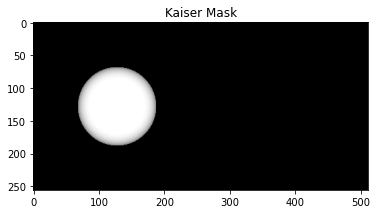

In [3]:
mask = KaiserMask((256,512), (128,128), 40, 60)

plt.title('Kaiser Mask')
plt.imshow(mask, cmap='gray')
plt.show()

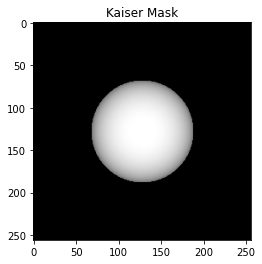

In [4]:
mask = KaiserMask((256,256), (128,128), 10, 60)

plt.title('Kaiser Mask')
plt.imshow(mask, cmap='gray')
plt.show()

<span style="color:blue">It looks like the KaiserMask is a pretty simple function. It creates a circle which gradually has edges that decay into the black background. In this case, when we used 40 as the radius that it starts to decay, the circle is whiter than the other and more quickly drops from pure white to black, while the other slowly erodes into black (relatively). This is because the second photo decays over a 50 pixel radius and the other decays in a 10 pixel radius.</span>